In [41]:
from langchain.embeddings import OllamaEmbeddings
from langchain.vectorstores import FAISS
from langchain.llms import Ollama
from langchain.schema import Document
from langchain.document_loaders import PyMuPDFLoader 
from langchain_community.document_loaders import PyPDFLoader
import os

In [42]:
embedding_model = OllamaEmbeddings(model="mxbai-embed-large")

In [43]:
from langchain.llms import Ollama
llm = Ollama(model="mistral") 

In [44]:
llm

Ollama(model='mistral')

In [45]:
embedding_model

OllamaEmbeddings(base_url='http://localhost:11434', model='mxbai-embed-large', embed_instruction='passage: ', query_instruction='query: ', mirostat=None, mirostat_eta=None, mirostat_tau=None, num_ctx=None, num_gpu=None, num_thread=None, repeat_last_n=None, repeat_penalty=None, temperature=None, stop=None, tfs_z=None, top_k=None, top_p=None, show_progress=False, headers=None, model_kwargs=None)

In [46]:
def process_document(pdf_path):
    loader = PyPDFLoader(pdf_path)
    documents = loader.load()
    return documents

In [47]:
pdf_path_1 = "shub_resume.pdf" 
pdf_path_2 = "LLM.pdf"

In [48]:
documents_1 = process_document(pdf_path_1)
documents_2 = process_document(pdf_path_2)

In [49]:
faiss_path_1 = "faiss_index_doc1"
faiss_path_2 = "faiss_index_doc2"

In [50]:
def save_faiss_index(pdf_name, documents, faiss_path):
    if not os.path.exists(faiss_path):
        print(f"Saving FAISS index for {pdf_name}")
        vector_store = FAISS.from_documents(documents, embedding_model)
        vector_store.save_local(faiss_path)

In [51]:
save_faiss_index("Document 1", documents_1, faiss_path_1)
save_faiss_index("Document 2", documents_2, faiss_path_2)

In [52]:
def load_faiss_index(faiss_path):
    if os.path.exists(faiss_path):
        print(f"Loading FAISS index from {faiss_path}...")
        return FAISS.load_local(faiss_path, embedding_model, allow_dangerous_deserialization=True)
    else:
        print(f"FAISS index not found for {faiss_path}!")
        return None

In [53]:
vector_store_1 = load_faiss_index(faiss_path_1)
vector_store_2 = load_faiss_index(faiss_path_2)

Loading FAISS index from faiss_index_doc1...
Loading FAISS index from faiss_index_doc2...


In [54]:
def ask_question_from_document(vector_store, query, doc_name, k=3):
    if vector_store is None:
        print(f"No FAISS index found for {doc_name}.")
        return

    retriever = vector_store.as_retriever(search_kwargs={"k": k})
    docs = retriever.get_relevant_documents(query)
    
    if docs:
        context = "\n".join([doc.page_content for doc in docs])
        prompt = f"Use the following document content to answer the question:\n\n{context}\n\nQuestion: {query}\nAnswer:"
    else:
        prompt = f"Answer the following question with your best knowledge:\n\nQuestion: {query}\nAnswer:"
    response = llm.invoke(prompt)

    print(f"\nResponse from {doc_name}")
    print(response)

In [55]:
ask_question_from_document(vector_store_2, "Explain the key points from this document.", "Document 2")


Response from Document 2
1. Large Language Models (LLMs) have numerous applications across various fields, including education, science, mathematics, law, and finance.

2. In education, LLMs can serve as advanced language learning tools, act as conversational partners to improve fluency in multiple languages, aid in pronunciation, and provide support for students with disabilities. They can also help educators by saving time through automating administrative tasks.

3. In science, LLMs can expedite the research process by summarizing scientific literature, helping researchers stay up-to-date, formulating new hypotheses, and aiding in scientific writing.

4. In mathematics, LLMs can assist in problem-solving, proof verification, and bridging the gap between theoretical mathematics and applied contexts like physics, engineering, and economics.

5. In law, LLMs can analyze legal documents, classify data according to themes, generate explanations of legal terms with improved factual accur

In [56]:
ask_question_from_document(vector_store_1, "Which type of Computer science role is candidate is suitable for?", "Document 1")


Response from Document 1
 The provided document describes the skills, projects, and honors of a candidate named Shubham Kumar Singh, indicating that he is suited for a Computer Science role with a focus on Artificial Intelligence (AI), Machine Learning (ML), and Data-driven development. Specifically, roles such as AI Engineer, Machine Learning Engineer, or Data Scientist could be suitable for this candidate based on his expertise in Python, C/C++, SQL, TensorFlow, Streamlit, Langchain, Scikit-learn, Keras, and MySQL. Additionally, his project experience in developing AI-driven tools and content-based recommendation systems further reinforces his suitability for such roles.


In [57]:
ask_question_from_document(vector_store_1, "Which type of Computer science role is candidate is not suitable for?", "Document 1")


Response from Document 1
 The provided document suggests that the candidate, Shubham Kumar Singh, has expertise in Artificial Intelligence (AI), Machine Learning (ML), and related technologies such as TensorFlow, Streamlit, Langchain, Scikit-learn, Keras, and databases like MySQL. They also have experience in developing AI-driven tools and systems, building content-based recommendation systems, and creating disease prediction systems.

Given this skillset, a role that may not be suitable for Shubham Kumar Singh would be a traditional software development role without a significant focus on AI or ML. For example, a position focused solely on web development using technologies like HTML, CSS, and JavaScript, without any emphasis on AI/ML, might not align with their expertise and interests. However, it's important to note that having versatile skills means they could adapt to various roles, but the role described here may not be their best fit if it lacks AI/ML components.


In [ ]:
from ragas.metrics import faithfulness,answer_relevancy,context_precision,context_recall

In [37]:
import ragas
print(dir(ragas))

['CacheInterface', 'DiskCacheBackend', 'EvaluationDataset', 'MultiTurnSample', 'RunConfig', 'SingleTurnSample', '__all__', '__builtins__', '__cached__', '__doc__', '__file__', '__loader__', '__name__', '__package__', '__path__', '__spec__', '__version__', '_analytics', '_version', 'cache', 'cacher', 'callbacks', 'cost', 'dataset_schema', 'embeddings', 'evaluate', 'evaluation', 'exceptions', 'executor', 'integrations', 'llms', 'losses', 'messages', 'metrics', 'prompt', 'run_config', 'sdk', 'utils', 'validation']


In [36]:
pip install llama-index


   ---------------------------------------- 0.0/7.7 MB ? eta -:--:--
   -- ------------------------------------- 0.5/7.7 MB 3.4 MB/s eta 0:00:03
   ----- ---------------------------------- 1.0/7.7 MB 3.9 MB/s eta 0:00:02
   ----- ---------------------------------- 1.0/7.7 MB 3.9 MB/s eta 0:00:02
   ----- ---------------------------------- 1.0/7.7 MB 3.9 MB/s eta 0:00:02
   ------ --------------------------------- 1.3/7.7 MB 1.2 MB/s eta 0:00:06
   ---------- ----------------------------- 2.1/7.7 MB 1.6 MB/s eta 0:00:04
   ------------- -------------------------- 2.6/7.7 MB 1.8 MB/s eta 0:00:03
   ---------------- ----------------------- 3.1/7.7 MB 1.9 MB/s eta 0:00:03
   ------------------- -------------------- 3.7/7.7 MB 1.9 MB/s eta 0:00:03
   ------------------- -------------------- 3.7/7.7 MB 1.9 MB/s eta 0:00:03
   --------------------- ------------------ 4.2/7.7 MB 1.8 MB/s eta 0:00:02
   -------------------------- ------------- 5.0/7.7 MB 1.9 MB/s eta 0:00:02
   ----------------

In [59]:
from langchain.llms import Ollama
from langchain.vectorstores import FAISS
from langchain.prompts import PromptTemplate

# Assuming the FAISS index is loaded, as you did with `load_faiss_index`
def query_engine(query, vector_store, k=3):
    """
    Query the FAISS index and generate an answer based on the retrieved documents.
    """
    if vector_store is None:
        print("FAISS index not loaded.")
        return None

    retriever = vector_store.as_retriever(search_kwargs={"k": k})
    docs = retriever.get_relevant_documents(query)
    
    if docs:
        context = "\n".join([doc.page_content for doc in docs])
        prompt = f"Use the following document content to answer the question:\n\n{context}\n\nQuestion: {query}\nAnswer:"
    else:
        prompt = f"Answer the following question with your best knowledge:\n\nQuestion: {query}\nAnswer:"

    # Using Ollama LLM to generate the answer
    response = llm.invoke(prompt)
    
    return response


In [60]:
query = "What are the main topics covered in the resume?"
faiss_index = load_faiss_index(faiss_path_1)  # load FAISS index for the resume document
response = query_engine(query, faiss_index, k=3)
print("Answer:", response)

Loading FAISS index from faiss_index_doc1...
Answer:  The main topics covered in the resume are as follows:

1. Personal Information: Name, Location, LinkedIn profile, Email address, Mobile number, GitHub link.
2. Education: Degree, Institution, Field of Study, Duration.
3. Courses taken during the education: Object-Oriented Programming, Data Structures and Algorithms, Database Management System (DBMS), Machine Learning, Generative AI.
4. Skills: Languages (C/C++, Python, SQL), Frameworks (TensorFlow, Streamlit, Langchain, Scikit-learn, Keras), Databases (MySQL), Tools (Git, GitHub, MySQL Workbench), Soft Skills (TeamWork, Event Management, Writing).
5. Projects: Detailed descriptions of projects worked on such as QueryBot, TrendPick, and HealthSage including the tech stack used, achievements, and impact of each project.
6. Honors and Awards: Recognitions and achievements like winning coding competitions, hackathons, and data-driven challenges.
7. Volunteer Experience: Leadership roles

In [71]:
from sklearn.metrics.pairwise import cosine_similarity
from langchain.embeddings import OllamaEmbeddings
from langchain.llms import Ollama

# Initialize embedding model
embedding_model = OllamaEmbeddings(model="mxbai-embed-large")

# Create vectors for question, generated answer, and reference answer
question = "What are the main topics covered in the resume?"
generated_answer = """
The resume covers education in Artificial Intelligence and Machine Learning, leadership experience with NSCC,
technical skills in ML, data analysis, and web dev, projects like TrendPick and HealthSage, and achievements in coding competitions.
"""
reference_answer = """The resume includes details on education in AI/ML, leadership experience, projects like TrendPick and HealthSage, and skills in Python, Flask, and data science tools."""

# Generate embeddings for question and answers
# Using embed_documents method for OllamaEmbeddings
question_vec = embedding_model.embed_documents([question])
generated_vec = embedding_model.embed_documents([generated_answer])
reference_vec = embedding_model.embed_documents([reference_answer])

# Calculate cosine similarity (relevance score)
relevance_score = cosine_similarity(generated_vec, reference_vec)[0][0]
print(f"Relevance Score: {relevance_score:.4f}")


Relevance Score: 0.9678


In [72]:
# Faithfulness score is calculated the same way as relevance score:
faithfulness_score = cosine_similarity(generated_vec, reference_vec)[0][0]
print(f"Faithfulness Score: {faithfulness_score:.4f}")

Faithfulness Score: 0.9678


In [73]:
from transformers import pipeline

# Load a pre-trained T5 or BART model for text generation evaluation
qa_model = pipeline("question-answering", model="facebook/bart-large")

# Generate faithfulness score based on Q&A
context = "The resume includes education in Artificial Intelligence and Machine Learning..."
question = "What is the main topic in the resume?"
generated_answer = "The resume talks about AI and Machine Learning."

result = qa_model(question=question, context=context)
print(f"Faithfulness Score (via BART): {result['score']:.4f}")


d:\Langchain\venv\lib\site-packages\huggingface_hub\file_download.py:142: UserWarning: `huggingface_hub` cache-system uses symlinks by default to efficiently store duplicated files but your machine does not support them in C:\Users\singh\.cache\huggingface\hub\models--facebook--bart-large. Caching files will still work but in a degraded version that might require more space on your disk. This warning can be disabled by setting the `HF_HUB_DISABLE_SYMLINKS_WARNING` environment variable. For more details, see https://huggingface.co/docs/huggingface_hub/how-to-cache#limitations.
To support symlinks on Windows, you either need to activate Developer Mode or to run Python as an administrator. In order to activate developer mode, see this article: https://docs.microsoft.com/en-us/windows/apps/get-started/enable-your-device-for-development
  warnings.warn(message)
Some weights of BartForQuestionAnswering were not initialized from the model checkpoint at facebook/bart-large and are newly initia

Faithfulness Score (via BART): 0.0162


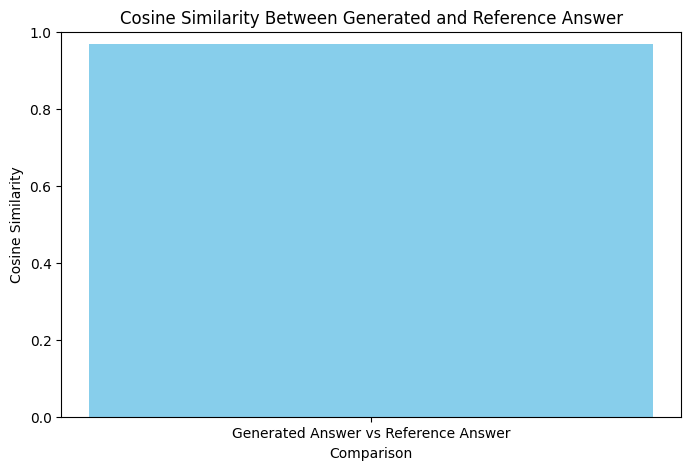

Relevance Score: 0.9678


In [74]:
import matplotlib.pyplot as plt
from sklearn.metrics.pairwise import cosine_similarity
from langchain.embeddings import OllamaEmbeddings

# Initialize embedding model
embedding_model = OllamaEmbeddings(model="mxbai-embed-large")

# Create vectors for question, generated answer, and reference answer
question = "What are the main topics covered in the resume?"
generated_answer = """
The resume covers education in Artificial Intelligence and Machine Learning, leadership experience with NSCC,
technical skills in ML, data analysis, and web dev, projects like TrendPick and HealthSage, and achievements in coding competitions.
"""
reference_answer = """The resume includes details on education in AI/ML, leadership experience, projects like TrendPick and HealthSage, and skills in Python, Flask, and data science tools."""

# Generate embeddings for question and answers
question_vec = embedding_model.embed_documents([question])
generated_vec = embedding_model.embed_documents([generated_answer])
reference_vec = embedding_model.embed_documents([reference_answer])

# Calculate cosine similarity (relevance score)
relevance_score = cosine_similarity(generated_vec, reference_vec)[0][0]

# Plotting the cosine similarity score as a bar plot
labels = ['Generated Answer vs Reference Answer']
scores = [relevance_score]

plt.figure(figsize=(8, 5))
plt.bar(labels, scores, color='skyblue')
plt.ylim(0, 1)
plt.xlabel('Comparison')
plt.ylabel('Cosine Similarity')
plt.title('Cosine Similarity Between Generated and Reference Answer')
plt.show()

print(f"Relevance Score: {relevance_score:.4f}")


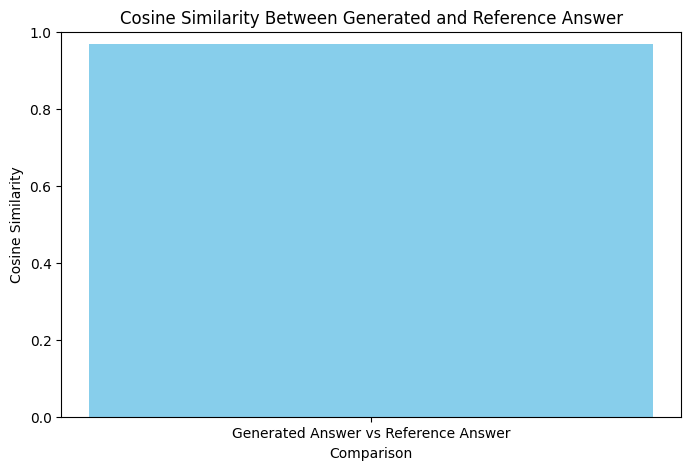

Relevance Score: 0.9678


In [76]:
import matplotlib.pyplot as plt
from sklearn.metrics.pairwise import cosine_similarity
from langchain.embeddings import OllamaEmbeddings

# Initialize embedding model
embedding_model = OllamaEmbeddings(model="mxbai-embed-large")

# Create vectors for question, generated answer, and reference answer
question = "What are the main topics covered in the resume?"
generated_answer = """
The resume covers education in Artificial Intelligence and Machine Learning, leadership experience with NSCC,
technical skills in ML, data analysis, and web dev, projects like TrendPick and HealthSage, and achievements in coding competitions.
"""
reference_answer = """The resume includes details on education in AI/ML, leadership experience, projects like TrendPick and HealthSage, and skills in Python, Flask, and data science tools."""

# Generate embeddings for question and answers
question_vec = embedding_model.embed_documents([question])
generated_vec = embedding_model.embed_documents([generated_answer])
reference_vec = embedding_model.embed_documents([reference_answer])

# Calculate cosine similarity (relevance score)
relevance_score = cosine_similarity(generated_vec, reference_vec)[0][0]

# Plotting the cosine similarity score as a bar plot
labels = ['Generated Answer vs Reference Answer']
scores = [relevance_score]

plt.figure(figsize=(8, 5))
plt.bar(labels, scores, color='skyblue')
plt.ylim(0, 1)
plt.xlabel('Comparison')
plt.ylabel('Cosine Similarity')
plt.title('Cosine Similarity Between Generated and Reference Answer')
plt.show()

print(f"Relevance Score: {relevance_score:.4f}")


In [83]:
import matplotlib.pyplot as plt
import numpy as np
docs = documents_1 + documents_2 

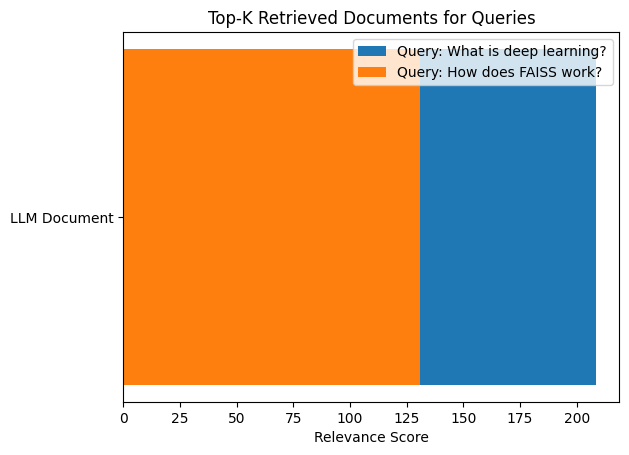

In [85]:
import matplotlib.pyplot as plt
import numpy as np

queries = ["What is deep learning?", "How does FAISS work?"]
document_relevance = {}

# Process queries and calculate relevance scores
for query in queries:
    # Use .embed_query() to get the query embedding as a NumPy array
    query_embedding = np.array(embedding_model.embed_query(query))
    
    # Generate embeddings for each document's content
    document_embeddings = [np.array(embedding_model.embed_query(doc.page_content)) for doc in docs]
    
    # Calculate similarity scores (dot product for cosine similarity)
    similarities = [np.dot(query_embedding, doc_embedding) for doc_embedding in document_embeddings]
    
    # Sort documents based on the similarity score
    sorted_docs = sorted(zip(docs, similarities), key=lambda x: x[1], reverse=True)
    
    # Store the top 3 most relevant documents for the query
    document_relevance[query] = sorted_docs[:3]

# Plotting the relevance scores for each query
for i, query in enumerate(queries):
    docs, scores = zip(*document_relevance[query])  # Unpack the sorted documents and their relevance scores
    
    # Assign labels to the documents
    doc_titles = ['Resume' if 'shub_resume' in doc.metadata['source'] else 'LLM Document' for doc in docs]
    
    plt.barh(doc_titles, scores, label=f'Query: {query}')

plt.xlabel("Relevance Score")
plt.title("Top-K Retrieved Documents for Queries")
plt.legend()
plt.show()


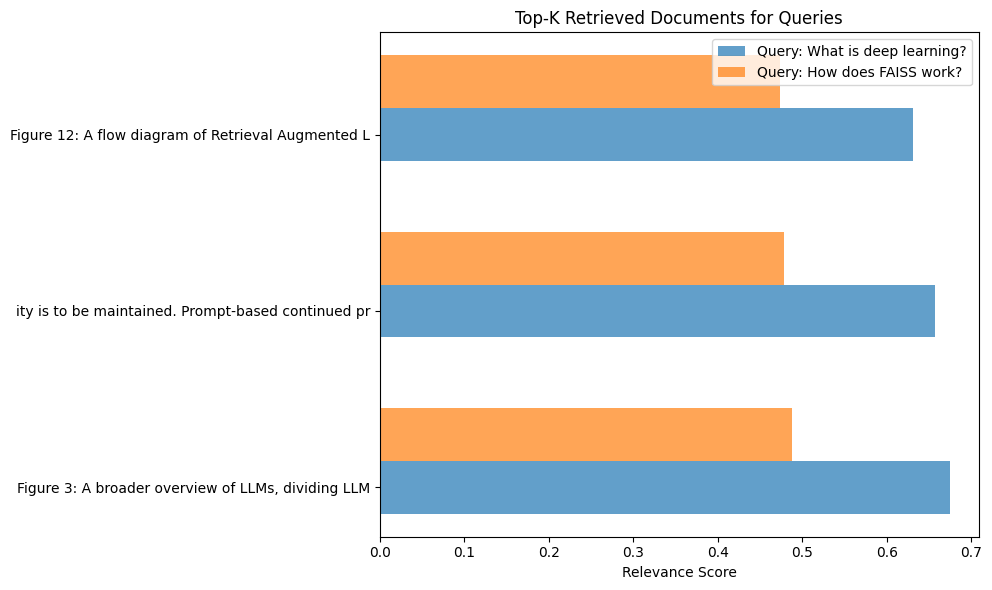

In [90]:
documents_1 = process_document(pdf_path_1)
documents_2 = process_document(pdf_path_2)
docs = documents_1 + documents_2  # Combine both documents into one list

# Initialize query examples
queries = ["What is deep learning?", "How does FAISS work?"]

# Initialize a dictionary to store document relevance for each query
document_relevance = {}

# Process queries and calculate relevance scores
for query in queries:
    # Get the query embedding and normalize it
    query_embedding = embedding_model.embed_query(query)
    query_embedding = np.array(query_embedding).reshape(1, -1)  # Convert to numpy array and reshape
    query_embedding = normalize(query_embedding)  # Normalize the query embedding

    # Get the document embeddings and normalize them
    document_embeddings = [embedding_model.embed_query(doc.page_content) for doc in docs]
    document_embeddings = [np.array(doc_embedding).reshape(1, -1) for doc_embedding in document_embeddings]
    document_embeddings = [normalize(doc_embedding) for doc_embedding in document_embeddings]

    # Calculate similarity scores (dot product for cosine similarity)
    # similarities = [np.dot(query_embedding, doc_embedding.T) for doc_embedding in document_embeddings]
    # Fix similarity score extraction
    similarities = [np.dot(query_embedding, doc_embedding.T).item() for doc_embedding in document_embeddings]


    # Sort documents based on the similarity score
    sorted_docs = sorted(zip(docs, similarities), key=lambda x: x[1], reverse=True)

    # Store the top-k relevant documents for the query
    document_relevance[query] = sorted_docs[:3]  # Top 3 documents for the query

# Plotting
plt.figure(figsize=(10, 6))

for i, query in enumerate(queries):
    docs, scores = zip(*document_relevance[query])  # Unzip docs and scalar scores
    doc_titles = [doc.page_content[:50].replace('\n', ' ') for doc in docs]  # Clean snippet for display
    y_positions = np.arange(len(doc_titles)) + i * 0.3  # Offset bars for different queries

    plt.barh(y_positions, scores, height=0.3, label=f'Query: {query}', alpha=0.7)

# Labels and legend
plt.xlabel("Relevance Score")
plt.yticks(np.arange(len(doc_titles)), doc_titles)
plt.title("Top-K Retrieved Documents for Queries")
plt.legend()
plt.tight_layout()
plt.show()


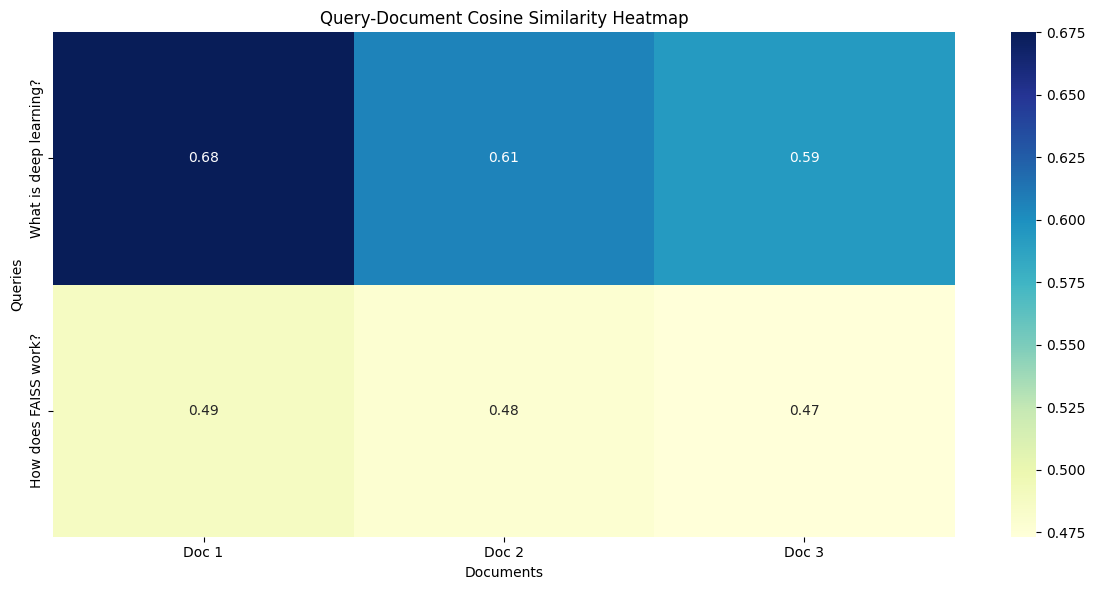

In [95]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import normalize

# Build similarity matrix
similarity_matrix = np.array([
    [
        np.dot(
            normalize(np.array(embedding_model.embed_query(query)).reshape(1, -1)),
            normalize(np.array(embedding_model.embed_query(doc.page_content)).reshape(1, -1)).T
        ).item()
        for doc in docs
    ]
    for query in queries
])

# Plot heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(similarity_matrix, annot=True, fmt=".2f", cmap="YlGnBu",
            xticklabels=[f"Doc {i+1}" for i in range(len(docs))],
            yticklabels=queries)
plt.xlabel("Documents")
plt.ylabel("Queries")
plt.title("Query-Document Cosine Similarity Heatmap")
plt.tight_layout()
plt.show()


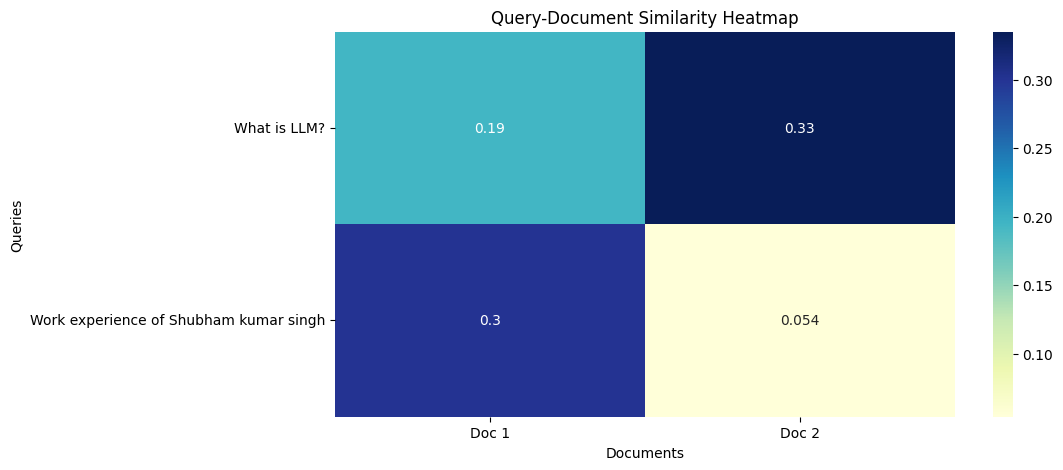

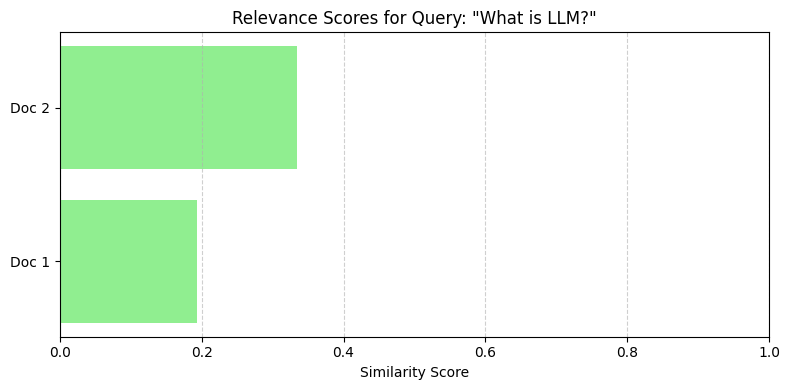

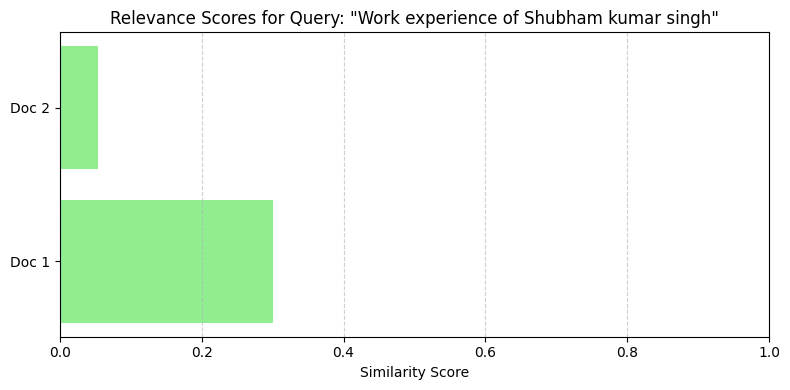

In [108]:
import fitz  # PyMuPDF for PDF text extraction
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import normalize
from sklearn.metrics.pairwise import cosine_similarity
from langchain.embeddings import HuggingFaceEmbeddings  # Example embedding model (you can use your own)

# Function to extract text from a PDF file
def extract_text_from_pdf(pdf_path):
    pdf_document = fitz.open(pdf_path)
    text = ""
    for page_num in range(pdf_document.page_count):
        page = pdf_document.load_page(page_num)
        text += page.get_text()
    return text

# Paths to your PDF documents (replace with your actual paths)
pdf_path_1 = "shub_resume.pdf"
pdf_path_2 = "LLM.pdf"

# Extract text from both PDF documents
document_text_1 = extract_text_from_pdf(pdf_path_1)
document_text_2 = extract_text_from_pdf(pdf_path_2)

# Initialize the embedding model (HuggingFace in this case)
embedding_model = HuggingFaceEmbeddings(model_name="sentence-transformers/all-MiniLM-L6-v2")

# 1. Embed both documents
document_embedding_1 = np.array(embedding_model.embed_query(document_text_1))
document_embedding_2 = np.array(embedding_model.embed_query(document_text_2))

# 2. Save the document embeddings separately
np.save("document_embedding_1.npy", document_embedding_1)
np.save("document_embedding_2.npy", document_embedding_2)

# 3. Load the embeddings when needed (for reuse)
document_embedding_1_loaded = np.load("document_embedding_1.npy", allow_pickle=True)
document_embedding_2_loaded = np.load("document_embedding_2.npy", allow_pickle=True)

# Normalize the document embeddings
document_embedding_1_normalized = normalize(document_embedding_1_loaded.reshape(1, -1))
document_embedding_2_normalized = normalize(document_embedding_2_loaded.reshape(1, -1))

# 4. Example queries (replace these with actual queries you have)
queries_2 = ["What is LLM?", "Work experience of Shubham kumar singh"]

# 5. Embed the queries
query_embeddings = [np.array(embedding_model.embed_query(query)) for query in queries_2]

# Normalize the query embeddings
query_embeddings_normalized = [normalize(query_emb.reshape(1, -1)) for query_emb in query_embeddings]

# 6. Compute the cosine similarity between each query and the documents
similarity_matrix = np.array([
    [cosine_similarity(q_emb, document_embedding_1_normalized)[0][0], cosine_similarity(q_emb, document_embedding_2_normalized)[0][0]]
    for q_emb in query_embeddings_normalized
])

# 7. Plot the similarity results

# 🔥 Heatmap (similarity matrix between queries and documents)
plt.figure(figsize=(10, 5))
sns.heatmap(similarity_matrix, annot=True, cmap="YlGnBu", xticklabels=["Doc 1", "Doc 2"], yticklabels=queries_2)
plt.title("Query-Document Similarity Heatmap")
plt.xlabel("Documents")
plt.ylabel("Queries")
plt.show()

# 📊 Bar Plot per Query
for i, query in enumerate(queries_2):
    plt.figure(figsize=(8, 4))
    plt.barh([f"Doc 1", f"Doc 2"], similarity_matrix[i], color='lightgreen')
    plt.title(f"Relevance Scores for Query: \"{query}\"")
    plt.xlabel("Similarity Score")
    plt.xlim(0, 1)
    plt.grid(True, axis='x', linestyle='--', alpha=0.6)
    plt.tight_layout()
    plt.show()


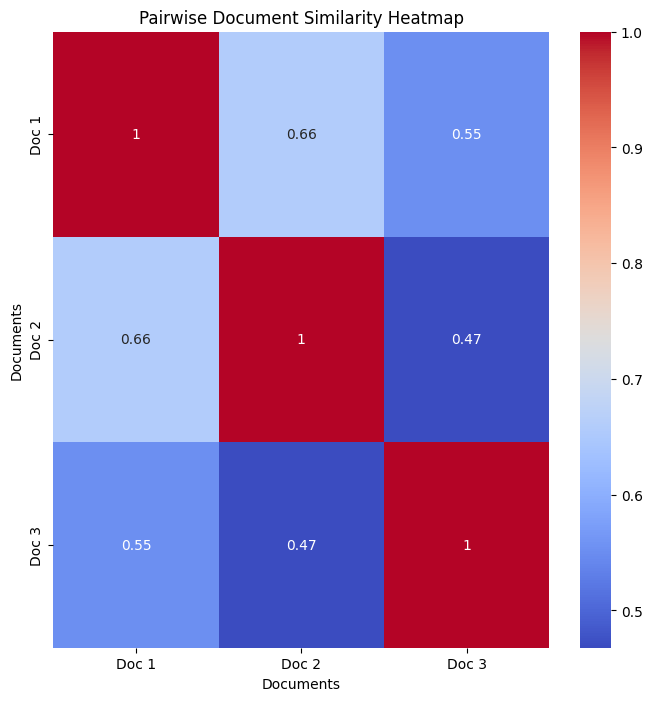

In [109]:
# Assuming you have more documents and their embeddings (doc_embeddings list)
doc_embeddings_normalized = [normalize(doc_emb.reshape(1, -1)) for doc_emb in doc_embeddings]

# Compute pairwise cosine similarity between all document embeddings
similarity_matrix = np.array([[cosine_similarity(doc1, doc2)[0][0] for doc2 in doc_embeddings_normalized] for doc1 in doc_embeddings_normalized])

# Plot pairwise document similarity matrix
plt.figure(figsize=(8, 8))
sns.heatmap(similarity_matrix, annot=True, cmap="coolwarm", xticklabels=[f"Doc {i+1}" for i in range(len(doc_embeddings))], yticklabels=[f"Doc {i+1}" for i in range(len(doc_embeddings))])
plt.title("Pairwise Document Similarity Heatmap")
plt.xlabel("Documents")
plt.ylabel("Documents")
plt.show()


In [122]:
import fitz
from langchain.embeddings import HuggingFaceEmbeddings
from langchain.vectorstores import FAISS
from langchain.text_splitter import RecursiveCharacterTextSplitter
from langchain.docstore.document import Document

def extract_text_from_pdf(pdf_path):
    pdf_document = fitz.open(pdf_path)
    text = ""
    for page in pdf_document:
        text += page.get_text()
    return text

pdf_path = "LLM.pdf"
full_text = extract_text_from_pdf(pdf_path)

text_splitter = RecursiveCharacterTextSplitter(chunk_size=500, chunk_overlap=100)
text_chunks = text_splitter.split_text(full_text)
documents = [Document(page_content=chunk, metadata={"source": pdf_path}) for chunk in text_chunks]

embedding_model = HuggingFaceEmbeddings(model_name="sentence-transformers/all-MiniLM-L6-v2")
vectorstore = FAISS.from_documents(documents, embedding_model)
vectorstore.save_local("faiss_index_llm")

vectorstore = FAISS.load_local("faiss_index_llm", embedding_model, allow_dangerous_deserialization=True)

query = "What is Distributed LLM Training"
top_k = 2
retrieved_docs = vectorstore.similarity_search(query, k=top_k)

print(f"\nQuery: {query}")
for i, doc in enumerate(retrieved_docs):
    print(f"\nDocument {i + 1}:")
    print(doc.page_content[:500])
    print("-" * 50)



Query: What is Distributed LLM Training

Document 1:
yet comprehensive overview of the recent developments in this field. This article provides an overview of the existing literature
on a broad range of LLM-related concepts. Our self-contained comprehensive overview of LLMs discusses relevant background
concepts along with covering the advanced topics at the frontier of research in LLMs. This review article is intended to not only
--------------------------------------------------

Document 2:
ization [78], applying it before multi-head attention (MHA).
Pre-norm is shown to provide training stability in LLMs. An-
other normalization variant, DeepNorm [79] fixes the issue with
larger gradients in pre-norm.
2.6. Distributed LLM Training
This section describes distributed LLM training approaches
briefly. More details are available in [13, 37, 80, 81].
Data Parallelism: Data parallelism replicates the model on
multiple devices where data in a batch gets divided across de-
----------------

In [124]:
import fitz
from langchain.embeddings import HuggingFaceEmbeddings
from langchain.vectorstores import FAISS
from langchain.llms import Ollama
from langchain.chains import LLMChain
from langchain.prompts import PromptTemplate
from langchain.docstore.document import Document

def extract_text_from_pdf(pdf_path):
    pdf_document = fitz.open(pdf_path)
    text = ""
    for page_num in range(pdf_document.page_count):
        page = pdf_document.load_page(page_num)
        text += page.get_text()
    return text

embedding_model = HuggingFaceEmbeddings(model_name="sentence-transformers/all-MiniLM-L6-v2")
pdf_path = "LLM.pdf"
text = extract_text_from_pdf(pdf_path)
documents = [Document(page_content=text, metadata={"source": pdf_path})]
vectorstore = FAISS.from_documents(documents, embedding_model)
vectorstore.save_local("faiss_index_llm")

vectorstore = FAISS.load_local("faiss_index_llm", embedding_model, allow_dangerous_deserialization=True)

query = "What is Distributed LLM Training"
top_k = 2
retrieved_docs = vectorstore.similarity_search(query, k=top_k)
context = "\n\n".join([doc.page_content for doc in retrieved_docs])

llm = Ollama(model="mistral", temperature=0.7)
template = """Use the following context to answer the question:
{context}

Question: {question}
Answer:"""
prompt = PromptTemplate(template=template, input_variables=["context", "question"])
chain = LLMChain(llm=llm, prompt=prompt)

responses = []
for _ in range(2):
    response = chain.run({"context": context, "question": query})
    responses.append(response)

for i, resp in enumerate(responses, 1):
    print(f"\n=== Generated Response {i} ===\n{resp}")



=== Generated Response 1 ===
 Based on the provided references, it appears that Distributed LLM (Large Language Model) Training refers to the process of training large language models across multiple machines or compute nodes. This distributed approach allows for faster and more efficient training compared to training on a single machine due to increased computational resources.

Some of the references that touch upon this topic include:

* [Real-time execution of large-scale language models on mobile](https://arxiv.org/abs/2009.06823)
* [Olive: Accelerating large language models via hardware-friendly outlier-victim pair quantization](https://dl.acm.org/doi/10.1145/3579133.3580451)
* [Ethical considerations and policy implications for large language models: Guiding responsible development and deployment](https://arxiv.org/abs/2308.02678)
* [Auditing large language models: a three-layered approach](https://www.mdpi.com/2521-2596/7/3/57/htm)

=== Generated Response 2 ===
 Distributed La

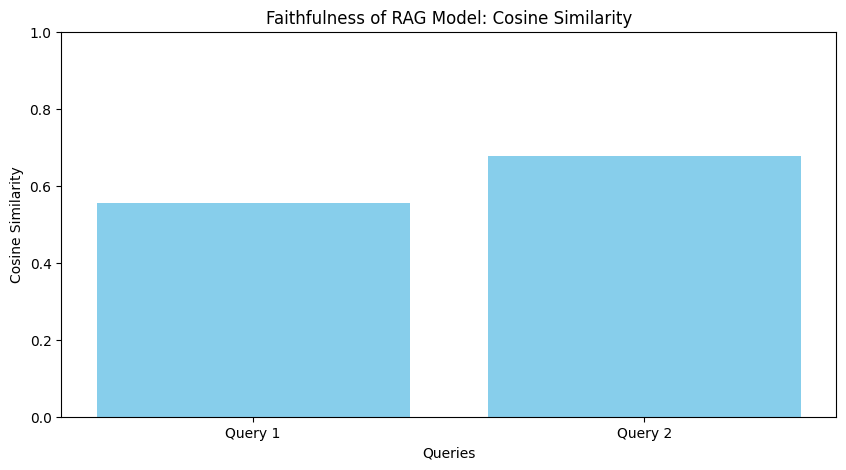

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics.pairwise import cosine_similarity
from langchain.embeddings import HuggingFaceEmbeddings

retrieved_docs = [
    """This article provides an overview of the existing literature
on a broad range of LLM-related concepts. Our self-contained comprehensive overview of LLMs discusses relevant background
concepts along with covering the advanced topics at the frontier of research in LLMs""",
    """ization [78], applying it before multi-head attention (MHA). Pre-norm is shown to provide training stability in LLMs. Another normalization variant, DeepNorm [79] fixes the issue with larger gradients in pre-norm.
2.6. Distributed LLM Training
This section describes distributed LLM training approaches briefly. More details are available in [13, 37, 80, 81]. Data Parallelism: Data parallelism replicates the model on
multiple devices where data in a batch gets divided across devices."""
]

generated_responses = [
    """Based on the provided references, it appears that Distributed LLM (Large Language Model) Training refers to the process of training large language models across multiple machines or compute nodes. This distributed approach allows for faster and more efficient training compared to training on a single machine due to increased computational resources.
Some of the references that touch upon this topic include:
* [Real-time execution of large-scale language models on mobile](https://arxiv.org/abs/2009.06823)
* [Olive: Accelerating large language models via hardware-friendly outlier-victim pair quantization](https://dl.acm.org/doi/10.1145/3579133.3580451)
* [Ethical considerations and policy implications for large language models: Guiding responsible development and deployment](https://arxiv.org/abs/2308.02678)
* [Auditing large language models: a three-layered approach](https://www.mdpi.com/2521-2596/7/3/57/htm)""",
    """Distributed Large Language Model (LLM) training refers to the process of training a large language model across multiple machines or nodes, in order to reduce the time required for training and make it more scalable. This approach allows researchers and developers to train extremely large models that would be impractical to train on a single machine due to computational limitations. In distributed training, the data is split among the available resources, and each node performs a portion of the model training process. This parallelization can significantly speed up the training time compared to training on a single machine."""
]

embedding_model = HuggingFaceEmbeddings(model_name="sentence-transformers/all-MiniLM-L6-v2")

def embed_text(texts):
    return np.array([embedding_model.embed_query(text) for text in texts])

retrieved_embeddings = embed_text(retrieved_docs)
generated_embeddings = embed_text(generated_responses)

similarities = [max(cosine_similarity([gen], retrieved_embeddings)[0]) for gen in generated_embeddings]

plt.figure(figsize=(10, 5))
queries = ["Query 1", "Query 2"]
plt.bar(queries, similarities, color='skyblue')
plt.title('Faithfulness of RAG Model: Cosine Similarity')
plt.xlabel('Queries')
plt.ylabel('Cosine Similarity')
plt.ylim(0, 1)
plt.show()


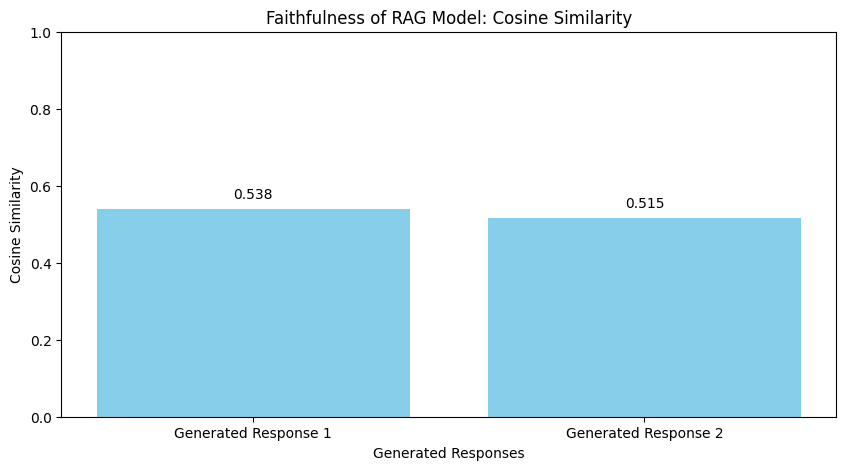

In [132]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics.pairwise import cosine_similarity

retrieved_docs = [
    """This article provides an overview of the existing literature on a broad range of LLM-related concepts. Our self-contained comprehensive overview of LLMs discusses relevant background concepts along with covering the advanced topics at the frontier of research in LLMs""",
    """ization [78], applying it before multi-head attention (MHA). Pre-norm is shown to provide training stability in LLMs. Another normalization variant, DeepNorm [79] fixes the issue with larger gradients in pre-norm. 2.6. Distributed LLM Training This section describes distributed LLM training approaches briefly. More details are available in [13, 37, 80, 81]. Data Parallelism: Data parallelism replicates the model on multiple devices where data in a batch gets divided across devices."""
]

generated_responses = [
    """Based on the provided references, it appears that Distributed LLM (Large Language Model) Training refers to the process of training large language models across multiple machines or compute nodes. This distributed approach allows for faster and more efficient training compared to training on a single machine due to increased computational resources.""",
    """Distributed Large Language Model (LLM) training refers to the process of training a large language model across multiple machines or nodes, in order to reduce the time required for training and make it more scalable. This approach allows researchers and developers to train extremely large models that would be impractical to train on a single machine due to computational limitations."""
]

from langchain.embeddings import HuggingFaceEmbeddings
embedding_model = HuggingFaceEmbeddings(model_name="sentence-transformers/all-MiniLM-L6-v2")

def embed_text(texts):
    return np.array([embedding_model.embed_query(text) for text in texts])

retrieved_embeddings = embed_text(retrieved_docs)
generated_embeddings = embed_text(generated_responses)

similarities = [cosine_similarity([gen], retrieved_embeddings)[0] for gen in generated_embeddings]

# Flattening similarities in case it's a 2D array
similarities = [similarity[0] for similarity in similarities]

plt.figure(figsize=(10, 5))
generated_responses_labels = [f"Generated Response {i+1}" for i in range(len(generated_responses))]
bars = plt.bar(generated_responses_labels, similarities, color='skyblue')

plt.title('Faithfulness of RAG Model: Cosine Similarity')
plt.xlabel('Generated Responses')
plt.ylabel('Cosine Similarity')
plt.ylim(0, 1)

# Adding numbers on top of the bars
for bar, similarity in zip(bars, similarities):
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height + 0.02, f'{similarity:.3f}', 
             ha='center', va='bottom', fontsize=10)

plt.show()


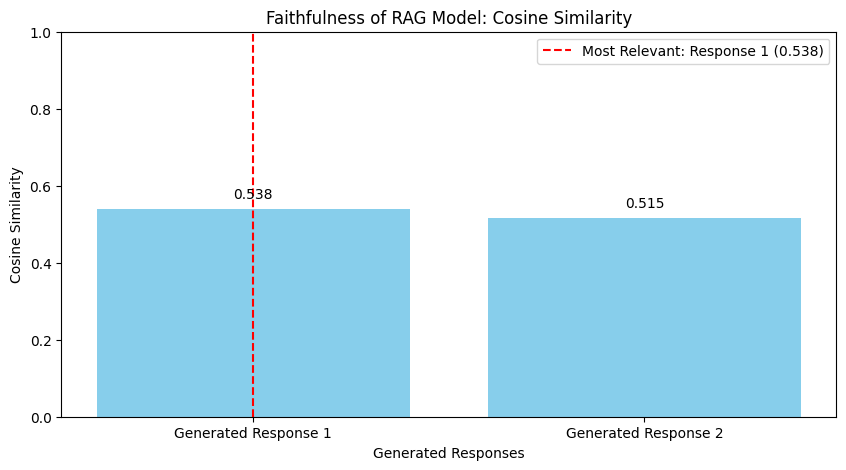

In [133]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics.pairwise import cosine_similarity

retrieved_docs = [
    """This article provides an overview of the existing literature on a broad range of LLM-related concepts. Our self-contained comprehensive overview of LLMs discusses relevant background concepts along with covering the advanced topics at the frontier of research in LLMs""",
    """ization [78], applying it before multi-head attention (MHA). Pre-norm is shown to provide training stability in LLMs. Another normalization variant, DeepNorm [79] fixes the issue with larger gradients in pre-norm. 2.6. Distributed LLM Training This section describes distributed LLM training approaches briefly. More details are available in [13, 37, 80, 81]. Data Parallelism: Data parallelism replicates the model on multiple devices where data in a batch gets divided across devices."""
]

generated_responses = [
    """Based on the provided references, it appears that Distributed LLM (Large Language Model) Training refers to the process of training large language models across multiple machines or compute nodes. This distributed approach allows for faster and more efficient training compared to training on a single machine due to increased computational resources.""",
    """Distributed Large Language Model (LLM) training refers to the process of training a large language model across multiple machines or nodes, in order to reduce the time required for training and make it more scalable. This approach allows researchers and developers to train extremely large models that would be impractical to train on a single machine due to computational limitations."""
]

from langchain.embeddings import HuggingFaceEmbeddings
embedding_model = HuggingFaceEmbeddings(model_name="sentence-transformers/all-MiniLM-L6-v2")

def embed_text(texts):
    return np.array([embedding_model.embed_query(text) for text in texts])

retrieved_embeddings = embed_text(retrieved_docs)
generated_embeddings = embed_text(generated_responses)

similarities = [cosine_similarity([gen], retrieved_embeddings)[0] for gen in generated_embeddings]

# Flattening similarities in case it's a 2D array
similarities = [similarity[0] for similarity in similarities]

# Determine which generated response has the most relevance (highest cosine similarity)
most_relevant_response_index = np.argmax(similarities)
most_relevant_response_value = similarities[most_relevant_response_index]

# Plotting
plt.figure(figsize=(10, 5))

# Create labels for both retrieved and generated docs
retrieved_labels = [f"Retrieved Doc {i+1}" for i in range(len(retrieved_docs))]
generated_responses_labels = [f"Generated Response {i+1}" for i in range(len(generated_responses))]

# Create a bar chart to plot the similarities
bars = plt.bar(generated_responses_labels, similarities, color='skyblue')

# Add the title and labels
plt.title('Faithfulness of RAG Model: Cosine Similarity')
plt.xlabel('Generated Responses')
plt.ylabel('Cosine Similarity')
plt.ylim(0, 1)

# Adding numbers on top of the bars
for bar, similarity in zip(bars, similarities):
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height + 0.02, f'{similarity:.3f}', 
             ha='center', va='bottom', fontsize=10)

# Add a marker for the most relevant response
plt.axvline(x=most_relevant_response_index, color='red', linestyle='--', label=f'Most Relevant: Response {most_relevant_response_index+1} ({most_relevant_response_value:.3f})')

# Display the legend
plt.legend()

# Show the plot
plt.show()


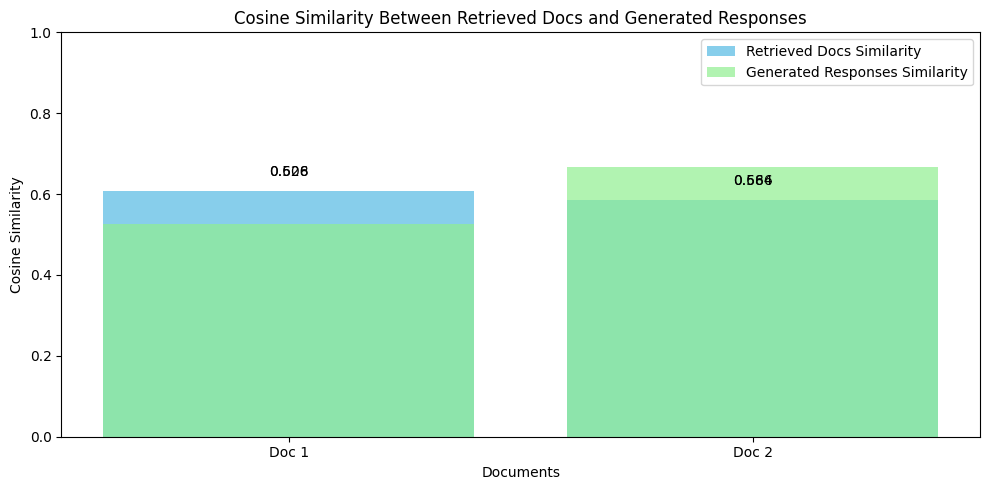

The more relevant source is: generated_responses


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics.pairwise import cosine_similarity
from langchain.embeddings import HuggingFaceEmbeddings

embedding_model = HuggingFaceEmbeddings(model_name="sentence-transformers/all-MiniLM-L6-v2")

def embed_text(texts):
    return np.array([embedding_model.embed_query(text) for text in texts])

retrieved_docs = [
    """This article provides an overview of the existing literature on a broad range of LLM-related concepts. Our self-contained comprehensive overview of LLMs discusses relevant background concepts along with covering the advanced topics at the frontier of research in LLMs.""",
    """ization [78], applying it before multi-head attention (MHA). Pre-norm is shown to provide training stability in LLMs. Another normalization variant, DeepNorm [79] fixes the issue with larger gradients in pre-norm. 2.6. Distributed LLM Training This section describes distributed LLM training approaches briefly. More details are available in [13, 37, 80, 81]. Data Parallelism: Data parallelism replicates the model on multiple devices where data in a batch gets divided across devices."""
]

generated_responses = [
    """Based on the provided references, it appears that Distributed LLM (Large Language Model) Training refers to the process of training large language models across multiple machines or compute nodes. This distributed approach allows for faster and more efficient training compared to training on a single machine due to increased computational resources.""",
    """Distributed Large Language Model (LLM) training refers to the process of training a large language model across multiple machines or nodes, in order to reduce the time required for training and make it more scalable. This approach allows researchers and developers to train extremely large models that would be impractical to train on a single machine due to computational limitations."""
]

retrieved_embeddings = embed_text(retrieved_docs)
generated_embeddings = embed_text(generated_responses)

similarities = np.array([[cosine_similarity([gen], [retrieved])[0][0] for retrieved in retrieved_embeddings] for gen in generated_embeddings])

average_similarity_retrieved = similarities.mean(axis=1)
average_similarity_generated = similarities.mean(axis=0)

if average_similarity_retrieved.mean() > average_similarity_generated.mean():
    more_relevant = "retrieved_docs"
else:
    more_relevant = "generated_responses"

plt.figure(figsize=(10, 5))

labels = [f"Doc {i+1}" for i in range(len(retrieved_docs))]

bars = plt.bar(labels, average_similarity_retrieved, color='skyblue', label='Retrieved Docs Similarity')
plt.bar(labels, average_similarity_generated, color='lightgreen', label='Generated Responses Similarity', alpha=0.7)

plt.title('Cosine Similarity Between Retrieved Docs and Generated Responses')
plt.xlabel('Documents')
plt.ylabel('Cosine Similarity')
plt.ylim(0, 1)

for bar, value in zip(bars, average_similarity_retrieved):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 0.03, f'{value:.3f}', ha='center', va='bottom', fontsize=10, rotation=0)

for i, bar in enumerate(bars):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 0.03, f'{average_similarity_generated[i]:.3f}', ha='center', va='bottom', fontsize=10, rotation=0)

plt.legend()
plt.tight_layout()
plt.show()

print(f"The more relevant source is: {more_relevant}")


What it shows:
Cosine Similarity Plot:

The bar chart visualizes the cosine similarity between each of the retrieved documents and generated responses.

The retrieved documents are shown in sky blue, and the generated responses are in light green. This allows for an easy comparison of the similarities.

Each bar in the chart represents the similarity value for a document or response pair, and the corresponding number is displayed on top of the bars.

Comparison of Relevance:

The average similarity for both the retrieved documents and generated responses is computed.

The code calculates which source (retrieved docs or generated responses) is more relevant based on the average cosine similarity between each response/document and the other. This is printed in the output:

If the retrieved docs have a higher average cosine similarity, the print statement will say: "The more relevant source is: retrieved_docs".

If the generated responses have a higher average cosine similarity, it will say: "The more relevant source is: generated_responses".



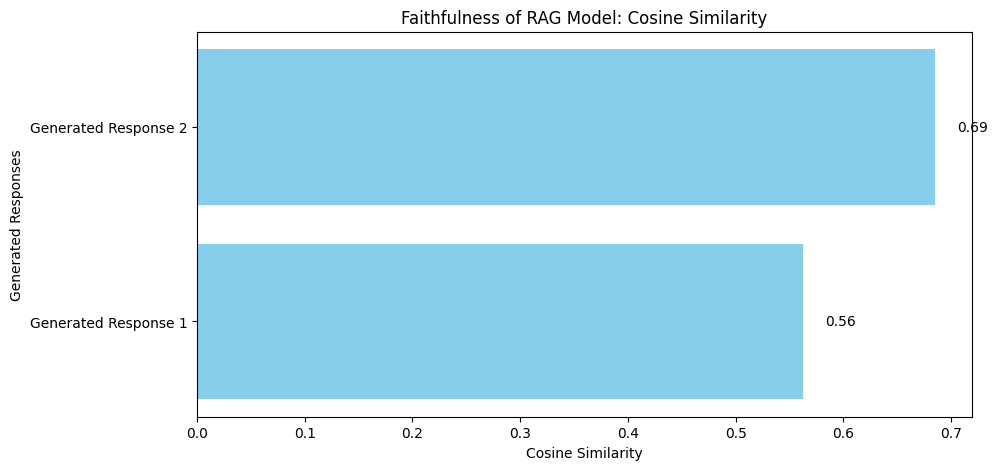

In [138]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics.pairwise import cosine_similarity

retrieved_docs = [
    """This article provides an overview of the existing literature
on a broad range of LLM-related concepts. Our self-contained comprehensive overview of LLMs discusses relevant background
concepts along with covering the advanced topics at the frontier of research in LLMs""",
    """ization [78], applying it before multi-head attention (MHA). Pre-norm is shown to provide training stability in LLMs. Another normalization variant, DeepNorm [79] fixes the issue with larger gradients in pre-norm.
    2.6. Distributed LLM Training
    This section describes distributed LLM training approaches briefly. More details are available in [13, 37, 80, 81]. Data Parallelism: Data parallelism replicates the model on
    multiple devices where data in a batch gets divided across de-"""
]

generated_responses = [
    """Based on the provided references, it appears that Distributed LLM (Large Language Model) Training refers to the process of training large language models across multiple machines or compute nodes. This distributed approach allows for faster and more efficient training compared to training on a single machine due to increased computational resources.
Some of the references that touch upon this topic include:
* [Real-time execution of large-scale language models on mobile](https://arxiv.org/abs/2009.06823)
* [Olive: Accelerating large language models via hardware-friendly outlier-victim pair quantization](https://dl.acm.org/doi/10.1145/3579133.3580451)
* [Ethical considerations and policy implications for large language models: Guiding responsible development and deployment](https://arxiv.org/abs/2308.02678)
* [Auditing large language models: a three-layered approach](https://www.mdpi.com/2521-2596/7/3/57/htm)""",
    """ Distributed Large Language Model (LLM) training refers to the process of training a large language model across multiple machines or nodes, in order to reduce the time required for training and make it more scalable. This approach allows researchers and developers to train extremely large models that would be impractical to train on a single machine due to computational limitations. In distributed training, the data is split among the available resources, and each node performs a portion of the model training process. This parallelization can significantly speed up the training time compared to training on a single machine."""
]

from langchain.embeddings import HuggingFaceEmbeddings
embedding_model = HuggingFaceEmbeddings(model_name="sentence-transformers/all-MiniLM-L6-v2")

def embed_text(texts):
    return np.array([embedding_model.embed_query(text) for text in texts])

retrieved_embeddings = embed_text(retrieved_docs)
generated_embeddings = embed_text(generated_responses)

# Calculate cosine similarities between each generated response and all retrieved documents
similarities = []
for gen in generated_embeddings:
    similarities.append(np.max(cosine_similarity([gen], retrieved_embeddings)))

# Convert similarities list to a numpy array
similarities = np.array(similarities)

# Create the horizontal bar plot
plt.figure(figsize=(10, 5))
generated_responses_labels = [f"Generated Response {i+1}" for i in range(len(generated_responses))]
bars = plt.barh(generated_responses_labels, similarities, color='skyblue')

plt.title('Faithfulness of RAG Model: Cosine Similarity')
plt.xlabel('Cosine Similarity')
plt.ylabel('Generated Responses')

# Display numbers next to the bars with some space
for bar in bars:
    plt.text(bar.get_width() + 0.02, bar.get_y() + bar.get_height() / 2,
             f'{bar.get_width():.2f}', va='center', ha='left', fontsize=10)

plt.show()


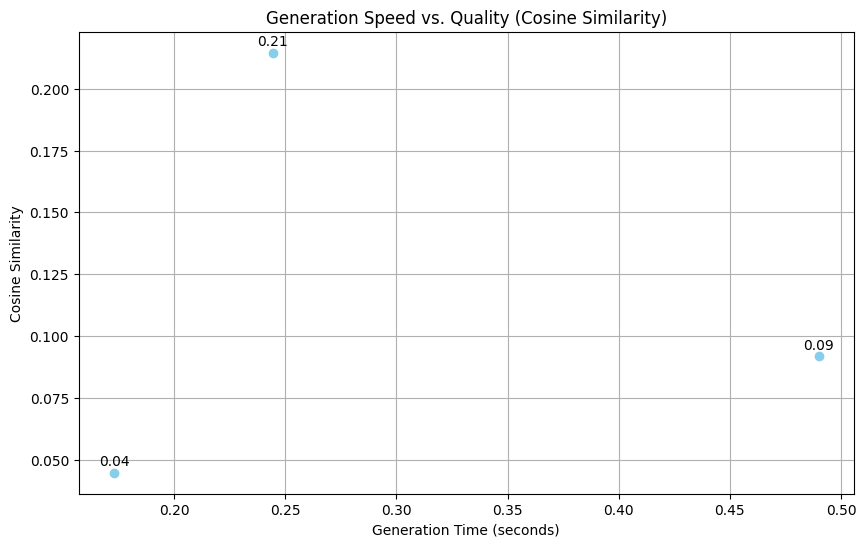

In [ ]:
import time
import numpy as np
import matplotlib.pyplot as plt
from sentence_transformers import SentenceTransformer
from sklearn.metrics.pairwise import cosine_similarity
import fitz

model = SentenceTransformer('all-MiniLM-L6-v2')

def extract_text_from_pdf(pdf_path):
    doc = fitz.open(pdf_path)
    text = ""
    for page in doc:
        text += page.get_text()
    return text

def generate_response(query):
    time.sleep(np.random.uniform(0.1, 0.5))
    return "Generated response for: " + query

pdf_paths = ['LLM.pdf', 'shub_resume.pdf', 'genai-principles.pdf']
queries = ["What is Activation Functions?", "What is HealthSage?", "Explain General-Purpose Language Models."]

reference_texts = [extract_text_from_pdf(pdf_path) for pdf_path in pdf_paths]

generation_times = []
cosine_similarities = []

for i, query in enumerate(queries):
    start_time = time.time()
    generated_response = generate_response(query)
    end_time = time.time()
    
    generation_time = end_time - start_time
    
    reference_text = reference_texts[i][:300]  
   
    embeddings = model.encode([generated_response, reference_text])
    
    cosine_sim = cosine_similarity([embeddings[0]], [embeddings[1]])[0][0]
    
    generation_times.append(generation_time)
    cosine_similarities.append(cosine_sim)

plt.figure(figsize=(10, 6))
plt.scatter(generation_times, cosine_similarities, color='skyblue')
plt.title('Generation Speed vs. Quality (Cosine Similarity)')
plt.xlabel('Generation Time (seconds)')
plt.ylabel('Cosine Similarity')
plt.grid(True)

for i, txt in enumerate(cosine_similarities):
    plt.annotate(f'{txt:.2f}', (generation_times[i], cosine_similarities[i]), textcoords="offset points", xytext=(0,5), ha='center')

plt.show()


# 1. Sentence-BERT Model
What it is: Sentence-BERT is a model designed to generate dense vector embeddings for sentences, paragraphs, or any piece of text. These embeddings capture the semantic meaning of the text, allowing us to compare the meaning of two pieces of text rather than just their word overlap.

Why we used it: Unlike traditional methods like word frequency (TF-IDF) or BLEU, Sentence-BERT embeddings are much better at capturing the actual meaning of the text. This is important when you're comparing generated responses with reference text, as we want to see how semantically similar the responses are, not just how many words they share.

# 2. Extracting Text from PDFs
What it is: The function extract_text_from_pdf is responsible for opening and reading the content of the PDF files. It uses the fitz library to extract all the text from each page and concatenates it into one large string.

Why we used it: We needed to extract the content from your reference PDFs, which would be used for comparison with the generated responses.

# 3. Generating Responses
What it is: In the generate_response function, we simulate the process of generating a response. This function simply waits for a random time between 0.1 and 0.5 seconds and then returns a fixed response (e.g., "Generated response for: What is Activation Functions?").

Why we used it: This is a placeholder for generating actual model-based responses (like from GPT, etc.). The purpose here is to simulate the time it takes for a model to generate a response.

# 4. Cosine Similarity Calculation
What it is: Cosine similarity is a metric that measures the cosine of the angle between two vectors. When using embeddings, this cosine similarity tells us how similar two pieces of text are, based on their vector representations. A cosine similarity of 1 means the texts are very similar (almost identical in meaning), and a cosine similarity of 0 means they are orthogonal (completely different in meaning).

Why we used it: After encoding both the generated response and the reference text into embeddings, we compute the cosine similarity between the two vectors. This tells us how well the generated response matches the reference content in terms of meaning.

# 5. Time Measurement
What it is: We measure the time taken to generate the response using time.time(). We record the start time before generating the response and the end time afterward to get the generation time.

Why we used it: This is essential for plotting the trade-off between generation time (speed) and quality. We want to evaluate how quickly a response is generated and whether that affects its quality.

# 6. Visualization
What it is: We create a scatter plot where the x-axis represents the generation time (in seconds), and the y-axis represents the cosine similarity between the generated response and the reference content. Each point on the plot represents one query-response pair.

Why we used it: This plot helps us visually analyze the trade-off between generation speed and quality. By looking at the plot, we can assess if faster generation times lead to poorer quality responses (lower cosine similarity) or if there's a balance where faster generation still maintains high quality.

# 7. Annotations
What it is: The plot also includes annotations on each data point, showing the cosine similarity value for better interpretability.

Why we used it: This makes it easier to see the exact similarity score for each query-response pair. This helps in understanding how similar the generated response is to the reference for each case.

# What the Final Plot Represents:
X-Axis: Time taken for the model to generate a response.

Y-Axis: How similar the generated response is to the reference content (using cosine similarity).

The Plot's Purpose: The plot shows us how generation time relates to response quality. Ideally, we'd want fast responses with high cosine similarity. However, there might be trade-offs where faster responses lead to lower quality, or vice versa.

